<img src="http://imgur.com/1ZcRyrc.png" style="float: left; margin: 20px; height: 55px">
 
# Dimensionality Reduction
 
_Authors: Alexander Egorenkov (DC), Kiefer Katovich (SF), Alexander Combs (NYC)_
 
---


<a id="learning-objectives"></a>
### Learning Objectives

- Describe high dimensionality
- Explain dimensionality reduction
- Explain the curse of dimensionality
- Describe the pros and cons of increasing and decreasing dimensonality
- Describe what PCA does and what it is used for in data science.
- Apply PCA to the iris and digits data

### Lesson Guide
- [What is high dimensionality?](#what-is-high-dimensionality)
- [Problems related to high dimensionality:](#problems-related-to-high-dimensionality)
	- [High memory requirements and Long model runtime](#high-memory-requirements-and-long-model-runtime)
	- [Non-informative features and multi-collinearity](#non-informative-features-and-multi-collinearity)
	- [The curse of dimensionality](#the-curse-of-dimensionality)
	- [Example - one dimension](#example---one-dimension)
	- [Example - two dimensions](#example---two-dimensions)
	- [Example - three dimensions](#example---three-dimensions)
- [Exceptions to the curse of dimensionality:](#exceptions-to-the-curse-of-dimensionality)
- [Dealing with high dimensionality](#dealing-with-high-dimensionality)
- [Feature Selection](#feature-selection)
	- [Selection by hand](#selection-by-hand)
	- [LASSO](#lasso)
	- [RandomForests](#randomforests)
- [Feature Selection Demo: Needle in a haystack](#feature-selection-demo-needle-in-a-haystack)
- [Feature Extraction](#feature-extraction)
	- [Feature engineering](#feature-engineering)
	- [Kernels](#kernels)
	- [Unsupervised dimensionality reduction and manifold learning algorithms](#unsupervised-dimensionality-reduction-and-manifold-learning-algorithms)
- [Dimensionality Reduction Demo](#dimensionality-reduction-demo)
	- [The Process of PCA](#the-process-of-pca)
	- [Principal Components](#principal-components)
	- [Why would we want to do PCA?](#why-would-we-want-to-do-pca)
- [Other Applications](#other-applications)


<a id="what-is-high-dimensionality"></a>
## What is high dimensionality?

High dimensionality occurs when we are attempting to proces many features with a model.

A special case is when there are more feature than there are observations  (p>n):
- Traditional models often can't be estimated in this case
- Machine learning models find a way to remove features of reduce redundant information

Even when there are fewer features than there are observations, high dimensionality can hinder model performance.

<a id="problems-related-to-high-dimensionality"></a>
## Problems related to high dimensionality:
- High memory requirements
- Long model runtime
- Non-informative features
- Multi-collinearity
- Hard to visualize
- The curse of dimensionality

<a id="high-memory-requirements-and-long-model-runtime"></a>
### High memory requirements and Long model runtime

When there are many feature to process. many models take a long time to compute.
- For models like KNN slow down propotional to the number of features because we have to compute distance in more and more dimensions.
- Models like Linear Regression take a longer time to train because there is more information to process during optimization.
- Tree based models have to consider more potential partitions of the data to account for every possible feature.

<a id="non-informative-features-and-multi-collinearity"></a>
### Non-informative features and multi-collinearity

Typically when we have many features, they are not all useful.
- Ideally, every feature we add to our model carries new information and helps use make better predictions.
- In many cases, our data is redundant and uses highly correlated information that describes similar effects.
- In other cases, many of our feature are entirely irrelevant and do not contain any predictive information.

<a id="the-curse-of-dimensionality"></a>
### The curse of dimensionality
As we **increase the number of dimensions (feature space)**, we effectively **increase the "empty space"** that our samples "live in".

- This is especially problematic for algorithms like KNN that look for the nearest neighbors because it becomes difficult to compute which neighbor is actually nearest.
- This is least problematic for algorithms like Naive Bayes that assume compelete independence of features.

<a id="example---one-dimension"></a>
### Example - one dimension
![](./assets/images/1-d-example.png)
- Taken from  http://www.visiondummy.com/2014/04/curse-dimensionality-affect-classification/

<a id="example---two-dimensions"></a>
### Example - two dimensions
![](./assets/images/2-d-example.png)

<a id="example---three-dimensions"></a>
### Example - three dimensions
![](./assets/images/3-d-example.png)

<a id="exceptions-to-the-curse-of-dimensionality"></a>
## Exceptions to the curse of dimensionality:
- The blessing of non-uniformity
There is a corollary to the curse of dimensionality, however, known as the "blessing of non-uniformity"
> "In most applications examples are not spread uniformly throughout
the instance space, but are concentrated on or near
a **lower-dimensional manifold**. For example, k-nearest neighbor
works quite well for handwritten digit recognition even
though images of digits have one dimension per pixel, because
the space of digit images is much smaller than the
space of all possible images." -Pedro Domingos
- Some classifers generalize well in high dimensions
>  "**Classifiers that tend to model non-linear decision boundaries very accurately (e.g. neural networks, KNN classifiers, decision trees) do not generalize well and are prone to overfitting.** Therefore, the dimensionality should be kept relatively low when these classifiers are used. If a classifier is used that generalizes easily (e.g. naive Bayesian, linear classifier), then the number of used features can be higher since the classifier itself is less expressive."
- We can create seperability in higher dimensions that does not exist in low dimension

With certain classifiers (linear) - going from a dimensionality that is too low doesn't allow us to effectively create a separating hyperplane. For example in our dogs and cats example, in 1d and 2d, we couldn't insert a separating plane to classify them correctly.

**In 3D, we can**
![](./assets/images/3d-hyperplane.png)

**But if we go too far....we can overfit our data as a consequence of the curse of dimensionality
**
![](./assets/images/projected-hyperplane.png)

**A more tangible example is replacing a variables with one or more polynomial functions.**

Below we have a chart of data that is not linearly seperable

Can you think of a way to make it linearly seperable?

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline 
plt.style.use('fivethirtyeight') 
plt.rcParams['figure.figsize'] = (14,10)

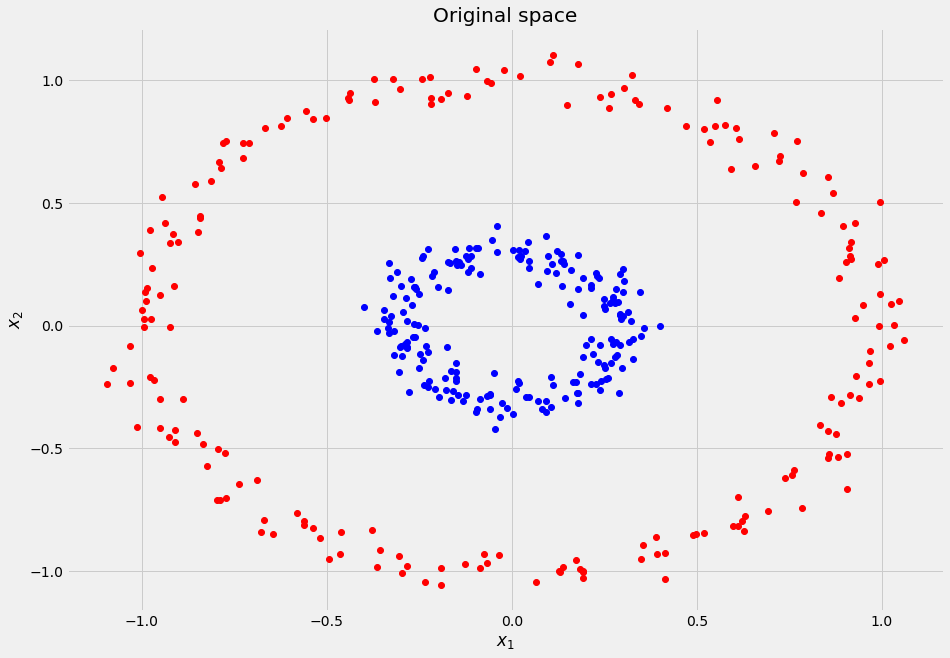

In [2]:
from sklearn.datasets import make_circles

np.random.seed(0)

X, y = make_circles(n_samples=400, factor=.3, noise=.05)

# Plot results

plt.figure()
#plt.subplot(2, 2, 1, aspect='equal')
plt.title("Original space")
reds = y == 0
blues = y == 1

plt.plot(X[reds, 0], X[reds, 1], "ro")
plt.plot(X[blues, 0], X[blues, 1], "bo")
plt.xlabel("$x_1$")
plt.ylabel("$x_2$")

<a id="dealing-with-high-dimensionality"></a>
## Dealing with high dimensionality

We've established that too many irrelevant features or redundant features can be a problem for our algorithms. What can we do about it?

<a id="feature-selection"></a>
## Feature Selection

The process of removing irrelevant features is called feature selection. 

For the most part, feature select just gets rid of variables that do not correlate with out out come variable.

This is surprisingly difficult because:
- Correlation is a linear measure of associated and we need to account for non-linearlity.
- Something the combination of features is relevant even though each individual feature is irrelevant.

The most common approaches to feature selection are:
- Selection by hand
- LASSO
- RandomForests

<a id="selection-by-hand"></a>
### Selection by hand

We should always aim to include all relevant features and no irrelevant features in our model, but this is often difficult.

We may not have enough domain knowledge to be able to intelligently select features.

The data may be too large to scan through and we are forced to select features using an automated processes.

This approach is ideal, but often takes too much time are is impossible with certain types of data.

<a id="lasso"></a>
### LASSO
LASSO, also known as L1 regularization, is a variation of linear and logistic regression that penalizes the magnitude of coefficients much like Ridge regression.

Any cofficients that are too large relative to the amount of error that they explain in the model are shrunk.

Unlike Ridge regression, LASSO will bring model coefficients all the way to zero effectively removing them from the linear regression.

LASSO is a significant improvement over looking at correlation because LASSO can account for many features at the same time.

LASSO is a frequently used approach to feature selection, but it has several limitations.

If we have too many irrelevant features, LASSO may not remove all of them. In other words, LASSO itself falls victim to the curse of dimensionality.

A high degree of multi-colinearity can also be problematic. Although, typically, if there are several multi-colinear variables, LASSO will just pick one for the model.

The other large weakness of LASSO is that it only looks at linear relationships between variables.

http://scikit-learn.org/stable/modules/linear_model.html#lasso

<a id="randomforests"></a>
### RandomForests

It may not be immediately obvious, but random forests have built in feature selection.

Remember that random forests build a multitude of decision trees on random samples of data and **random samples of features**.

Decision trees look for features that do the best job of partitioning our data to reduce MSE or Gini Impurity.

It turns out that by looking at random features and selecting the ones that have the most explanatory power, we select the most important features for the random forest.

By looking at feature importances for a random forest, we can exclude the most irrelevant features.

Random forests make one major improvement over LASSO, which is the ability to handle non-linear relationships.

However, random forests typically perform worse in high dimensions and don't do as well with linear relationships as LASSO.

<a id="feature-selection-demo-needle-in-a-haystack"></a>
## Feature Selection Demo: Needle in a haystack

The goal is simple, you need to use LASSO to find the irrelevant feature. 

I've created a simulated dataset that offers very little visual cue as to which features are important. Among the twelve features, there is precisely 1 that has no effect on the outcome variable.

**Load the haystack data**

In [3]:
df = pd.read_csv('./assets/data/haystack.csv')

**Feel free to do some exploratory data analysis**

In [4]:
df.corr()

,x1,x10,x11,x12,x2,x3,x4,x5,x6,x7,x8,x9,y
x1,1.000000,-0.068843,0.514319,-0.490287,-0.008870,-0.010470,-0.500276,0.005647,-0.541419,-0.718064,-0.018260,-0.033086,-0.513137
x10,-0.068843,1.000000,-0.045790,0.025257,-0.007193,0.012264,0.016402,0.006862,0.052072,0.045419,0.006938,-0.035687,0.213304
x11,0.514319,-0.045790,1.000000,-0.477212,0.004677,-0.041444,-0.502883,-0.020585,-0.464414,-0.676443,-0.020433,-0.002773,-0.771479
x12,-0.490287,0.025257,-0.477212,1.000000,0.022880,0.013771,0.487885,0.009311,0.455476,0.706840,0.007880,0.025174,0.474502
x2,-0.008870,-0.007193,0.004677,0.022880,1.000000,-0.005612,-0.001354,-0.018358,0.033575,0.035665,-0.017254,0.019337,-0.218917
x3,-0.010470,0.012264,-0.041444,0.013771,-0.005612,1.000000,0.002050,-0.012114,-0.000089,0.019422,-0.014989,-0.031317,0.371999
x4,-0.500276,0.016402,-0.502883,0.487885,-0.001354,0.002050,1.000000,-0.046669,0.501566,0.712661,0.034174,0.001452,0.766462
x5,0.005647,0.006862,-0.020585,0.009311,-0.018358,-0.012114,-0.046669,1.000000,-0.022885,-0.003013,-0.014147,-0.035861,0.019494
x6,-0.541419,0.052072,-0.464414,0.455476,0.033575,-0.000089,0.501566,-0.022885,1.000000,0.689245,0.032195,0.021141,0.513401
x7,-0.718064,0.045419,-0.676443,0.706840,0.035665,0.019422,0.712661,-0.003013,0.689245,1.000000,0.029134,0.016430,0.705370


/home/alex/anaconda3/lib/python2.7/site-packages/ipykernel_launcher.py:1: FutureWarning: pandas.scatter_matrix is deprecated. Use pandas.plotting.scatter_matrix instead
  """Entry point for launching an IPython kernel.


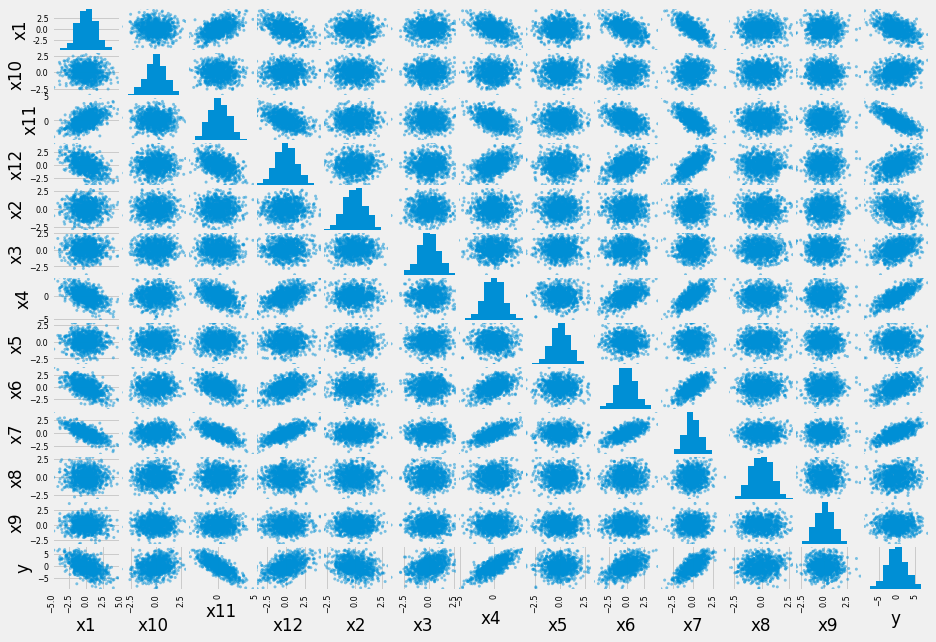

In [5]:
pd.scatter_matrix(df);

**Import LASSO for use**

Documentation can be found here: http://scikit-learn.org/stable/modules/generated/sklearn.linear_model.Lasso.html

In [6]:
from sklearn.linear_model import Lasso

**Create X feature matric and y outcome**

In [7]:
features = filter(lambda x: x.startswith('x'), df.columns)
X = df[features]
y = df['y']

**Fit the LASSO regression**

In [8]:
lm = Lasso(alpha=0.00001, normalize=True)
lm.fit(X,y)

Lasso(alpha=1e-05, copy_X=True, fit_intercept=True, max_iter=1000,
   normalize=True, positive=False, precompute=False, random_state=None,
   selection='cyclic', tol=0.0001, warm_start=False)

**View LASSO coefficients and identify which feature is irrelevant**

In [9]:
pd.DataFrame(lm.coef_.T, X.columns)

,0
x1,0.049418
x10,0.499684
x11,-0.999670
x12,-0.049507
x2,-0.599703
x3,0.999683
x4,0.999641
x5,0.099656
x6,0.099549
x7,0.000000


<a id="feature-extraction"></a>
## Feature Extraction
Whereas feature selection attempts to discover relevant subsets of the original data, feature extraction combines key features of a potentially correlated dataset resulting in a new  more linear non-correlated dataset with fewer features.

Common approaches to feature extraction are:
- Feature engineering
- Kernels
- Unsupervised dimensionality reduction and manifold learning algorithms    

<a id="feature-engineering"></a>
### Feature engineering
Feature engineering is the manual reshaping of our data to create new features.

When we create new features we aim to improve the ability of our algorithms to model our data.

Since our algorithms typically only find linear, quadratic, and recti-linear boundaries, we need to simplify complicated relationships into ones that can be modeled.

Generating a new feature that is irrelevant will not help.

Generating a new feature that is redundant with a previous one will not help

<a id="kernels"></a>
### Kernels

Kernels are a different approach to non-linearity. 

Rather than transforming our data directly, we can transform the space that our data lives in.

Common kernels are **polynomial kernels** and the **Radial Basis Function kernel** which allows use to transform linear relationships into polynomial ones or into gaussian blobs.

Kernel methods are computationaly efficient and are prefered to doing the same kinds of transformations by hand.

<a id="unsupervised-dimensionality-reduction-and-manifold-learning-algorithms"></a>
### Unsupervised dimensionality reduction and manifold learning algorithms

Dimensionality reduction algorithms aim to remove redundancy from our data by recombining several feature into a smaller number of features.

Primary Components Analysis is the quintessential "dimensionality reduction" algorithm. 

A related class of algorithm fall under the name of manifold learning, but they roughly the same focus.

**What is a manifold?**

**From wikipedia**: In mathematics, a manifold is a topological space that locally resembles Euclidean space near each point. More precisely, each point of an n-dimensional manifold has a neighbourhood that is homeomorphic to the Euclidean space of dimension n. In this more precise terminology, a manifold is referred to as an n-manifold.

That is a very dense definition, it may be easier to digest using a map as an example.

https://xkcd.com/977/

When we make maps, we have to find a way to represent the Earth, a three dimensional object in 3-D euclidean space, in two dimensions. 

We can't just choose any way to draw the Earth in 2-D, we want to preserve a sense of distance so that every centimeter on the map corresponds to some number of kilometers in the real world. This is the "locally resembles Euclidean space near each point" part.

Manifold learning is a form of dimensionality reduction that focuses on preserving particular relationships in the data.

The key is to make sure that:
- Every point in high-dimensional space corresponds to a point in low-dimensional space.
- The distance between two points in high-dimensional space corresponds to the distance between the corresponding points in low-dimensional space.

<a id="dimensionality-reduction-demo"></a>
## Dimensionality Reduction Demo

Dimensionality reduction reduces the number of random variables that you are considering for analysis until you are left with the most important variables.

Dimensionality reduction is not an end goal in itself, but a tool to form a dataset with more parsimonious features for further visualization and/or modelling.

To get a quick summary of our data, we can calculate a covariance matrix, an unstandardized correlation matrix.

The diagonal elements in a covariance matrix show us the variance of each of our features.

The off-diagnal elements show the covariance, the amount of colinearity and redundancy between our variables.

**What would an 'ideal' covariance matrix look like?**

An "ideal" covariance matrix for data would have large numbers (variances) along the diagonal because this would indicate a large amount of potential signal in the data. It would also have zero values in the off-diagonal elements because these values indicate redundancy across our variables.
What can we do to try to remove any redundancies and preserve the signal?
Enter PCA!

**PCA is the quintessential "dimensionality reduction" algorithm.**

_Dimensionality reduction_ is the process of combining or collapsing the existing features (columns in X) into fewer features. 

These hopefully:

- Retain the signal in the original data, and
- Reduce noise.

---

PCA finds the linear combinations of your current predictor variables that create new "principal components". The principal components explain (in order) the maximum possible amount of variance in your predictors.

A more natural way of thinking about PCA is that **it transforms the coordinate system so that the axes become the  most concise, informative descriptors of our data as a whole.**

The old axes are the original variables (columns). The new axes are the principal components from PCA.


<a id="the-process-of-pca"></a>
### The Process of PCA 

---

Say we have a matrix $X$ of predictor variables. PCA will give us the ability to transform our $X$ matrix into a new matrix $Z$. 

First we will derive a **weighting matrix** $W$ from the correlational/covariance structure of $X$ that allows us to perform the transformation.

$${\displaystyle \mathbf {Z} =\mathbf {X} \mathbf {W} }$$

Each successive dimension (column) in $Z$ will be rank-ordered according to variance in its values!

**Two assumptions that PCA makes:**
1. **Linearity:** The data does not hold nonlinear relationships.
2. **Large variances define importance:** The dimensions are constructed to maximize remaining variance.

The resulting principal components (columns of $Z$) will be uncorrelated. This makes PCA a useful preprocessing step for algorithms requiring uncorrelated input features.

<a id="principal-components"></a>
### Principal Components

---

What is a principal component? **Principal components are the vectors that define the new coordinate system for your data.** Transforming your original data columns onto the principal component axes construct new variables that are optimized to explain as much variance as possible and to be independent (uncorrelated).

Creating these variables is a well-defined mathematical process. In essence, **each component is created as a weighted sum of your original columns, such that all components are orthogonal (perpendicular) to each other**.

<a id="why-would-we-want-to-do-pca"></a>
### Why would we want to do PCA?

---

- We can reduce the number of dimensions (remove less important components), while losing mostly noise rather than signal.
- Since we are assuming our variables are interrelated (at least in the sense that they together explain a dependent variable), the information of interest should exist along directions with largest variance.
- The directions of largest variance should have the highest signal-to-noise ratio.
- Correlated predictor variables (also referred to as "redundancy" of information) are combined into independent variables. Our predictors from PCA are guaranteed to be independent.

---

[Good paper on PCA](http://arxiv.org/pdf/1404.1100.pdf)

[Nice site on performing PCA](http://sebastianraschka.com/Articles/2015_pca_in_3_steps.html#pca-vs-lda)

### Load in and visualize the iris data.

In [11]:
from sklearn import datasets

In [13]:
iris = datasets.load_iris()
irisdf = pd.DataFrame(iris.data, columns=iris.feature_names)
irisdf['target'] = iris.target

In [14]:
cmap = {'0': 'r', '1': 'g', '2': 'b' }
irisdf['ctarget'] = irisdf.target.apply(lambda x: cmap[str(x)])

/home/alex/anaconda3/lib/python2.7/site-packages/ipykernel_launcher.py:1: FutureWarning: pandas.scatter_matrix is deprecated. Use pandas.plotting.scatter_matrix instead
  """Entry point for launching an IPython kernel.


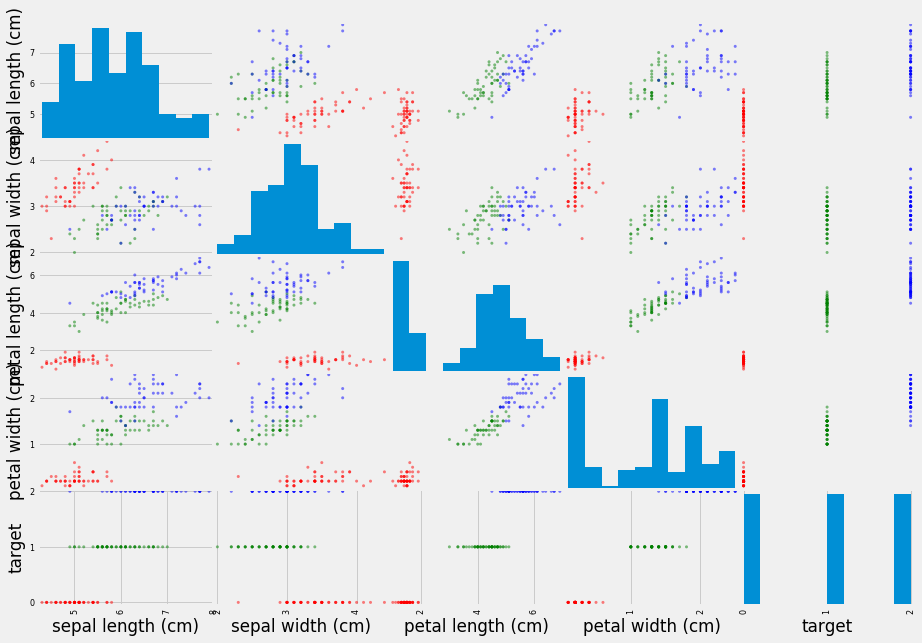

In [15]:
pd.scatter_matrix(irisdf, c=irisdf.ctarget);

### Perform a Primary Components Analysis on the four feature columns in the iris data.

In [20]:
from sklearn.preprocessing import StandardScaler
from sklearn import decomposition

In [21]:
features = ['sepal length (cm)', 'sepal width (cm)', 'petal length (cm)', 'petal width (cm)']
X = irisdf[features]
y = irisdf['target']

In [22]:
pca = decomposition.PCA(n_components=2)
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)
X = pca.fit_transform(X)

/home/alex/anaconda3/lib/python2.7/site-packages/ipykernel_launcher.py:5: FutureWarning: pandas.scatter_matrix is deprecated. Use pandas.plotting.scatter_matrix instead
  """


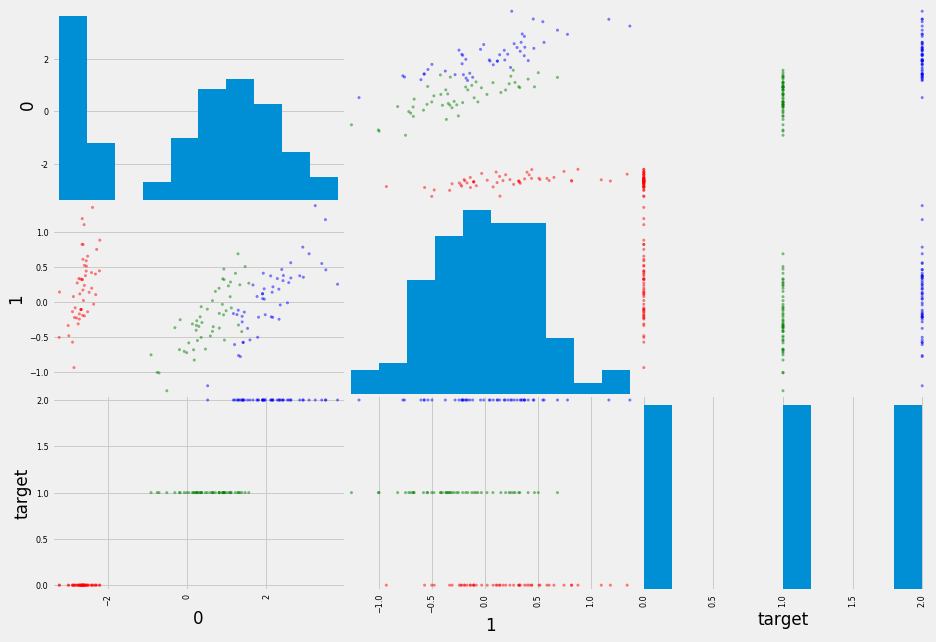

In [23]:
pca_irisdf = pd.DataFrame(X)
pca_irisdf['ctarget'] = pd.Series(y).apply(lambda x: cmap[str(x)])
pd.scatter_matrix(
    pd.concat([pd.DataFrame(X), pd.DataFrame(y, columns=['target'])], axis=1),
    c=pca_irisdf.ctarget);

### We can access the weighting matrix (W), by looking at pca.components_

In [24]:
pca.components_

array([[ 0.36158968, -0.08226889,  0.85657211,  0.35884393],
       [ 0.65653988,  0.72971237, -0.1757674 , -0.07470647]])

### We can also look at the percent of variation explaned by each component.

Looking at this allows us to understand how important each component is and too see if any components can be dropped to reduce dimensionality further.

In [25]:
pca.explained_variance_ratio_

array([ 0.92461621,  0.05301557])

## Exercise: reconstruct the two primary components by hand.

### To start with, a visualization of the first and second component has been done for you.

In [26]:
iris = datasets.load_iris()
irisdf = pd.DataFrame(iris.data, columns=iris.feature_names)
irisdf['target'] = iris.target

In [27]:
features = ['sepal length (cm)', 'sepal width (cm)', 'petal length (cm)', 'petal width (cm)']
X = irisdf[features]
y = irisdf['target']

In [28]:
pca = decomposition.PCA(n_components=2)
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)
X = pca.fit_transform(X)

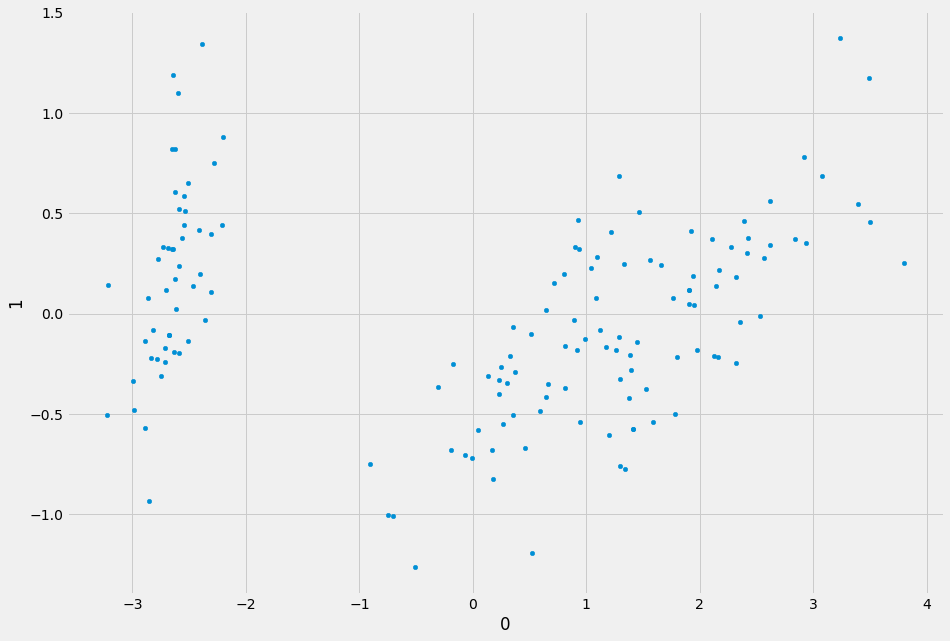

In [29]:
pca_irisdf.plot(kind='scatter', x=0, y=1)

### Now it's your turn. First retrieve the weighting matrix to find out what weights of features PCA decided to use.

In [30]:
pca.components_

array([[ 0.36158968, -0.08226889,  0.85657211,  0.35884393],
       [ 0.65653988,  0.72971237, -0.1757674 , -0.07470647]])

### Now use the weights from above to recreate a column '0' and '1' in new_df by reweighing the original columns.

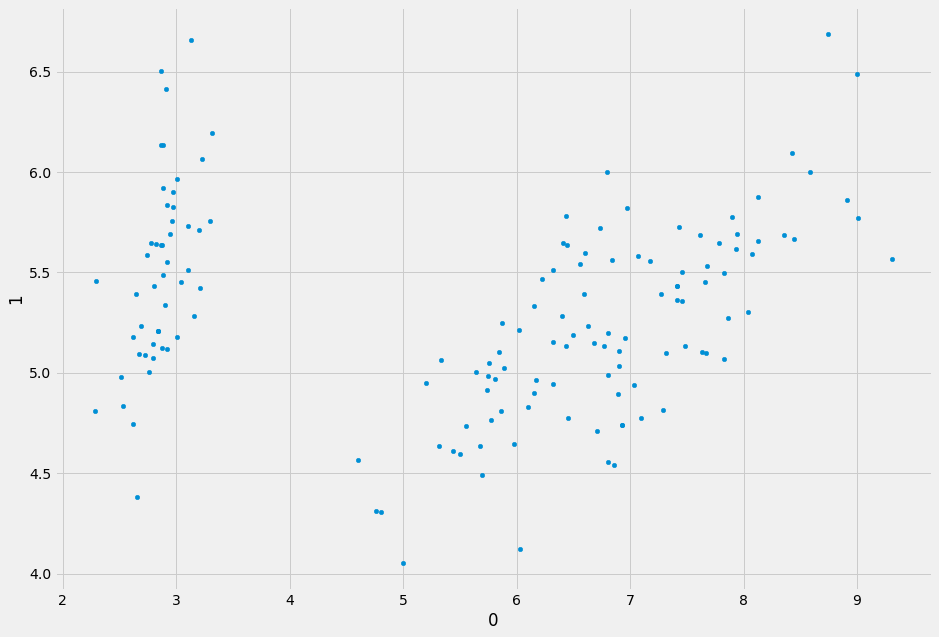

In [31]:
new_df = irisdf[features].copy()
new_df['0'] = 0.36158968*new_df['sepal length (cm)'] + \
    -0.08226889*new_df['sepal width (cm)'] + \
    0.85657211*new_df['petal length (cm)'] + \
    0.35884393*new_df['petal width (cm)']
new_df['1'] = 0.65653988*new_df['sepal length (cm)'] + \
    0.72971237*new_df['sepal width (cm)'] + \
    -0.1757674*new_df['petal length (cm)'] + \
    -0.07470647*new_df['petal width (cm)']

new_df.plot(kind='scatter', x='0', y='1')

## Demo: The application of primary components on the digits dataset

Optical Character Recognition is the machine task of recognizing characters, in this case, hand-written digits.

We'll will use a famous dataset, MNIST digits, to see what we can do with KNN. The resolution is very low and only shows 8 by 8 pixel images.

The dataset and description is available here: http://archive.ics.uci.edu/ml/datasets/optical+recognition+of+handwritten+digits

Some of the hard work has already been done for us; The data has been preprocessed to remove common irregularities.

### Load in the digits data set from sklearn.

This does not load in as a dataframe like we are used to, but instead is a native format to sklearn called a "Bunch"

In [32]:
from sklearn.datasets import load_digits
digits = load_digits()
print digits.keys()

['images', 'data', 'target_names', 'DESCR', 'target']


### Preview a few rows of the data to see how it is constructed.

We have 64 features of the data, one for each pixel in the 8x8 pixel image.

In [33]:
pd.DataFrame(digits.data).head()

,0,1,2,3,4,5,6,7,8,9,...,54,55,56,57,58,59,60,61,62,63
0,0.0,0.0,5.0,13.0,9.0,1.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,6.0,13.0,10.0,0.0,0.0,0.0
1,0.0,0.0,0.0,12.0,13.0,5.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,11.0,16.0,10.0,0.0,0.0
2,0.0,0.0,0.0,4.0,15.0,12.0,0.0,0.0,0.0,0.0,...,5.0,0.0,0.0,0.0,0.0,3.0,11.0,16.0,9.0,0.0
3,0.0,0.0,7.0,15.0,13.0,1.0,0.0,0.0,0.0,8.0,...,9.0,0.0,0.0,0.0,7.0,13.0,13.0,9.0,0.0,0.0
4,0.0,0.0,0.0,1.0,11.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,2.0,16.0,4.0,0.0,0.0


### Use matplotlib functionality to visualize the handwritten digits

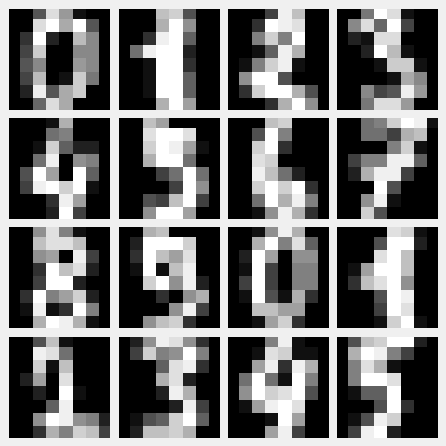

In [34]:
fig = plt.figure(figsize=(6,6))
fig.subplots_adjust(left=0, right=1, bottom=0, top=1, hspace=0.05, wspace=0.05)

# Plot the faces
for i in range(16):
    ax = fig.add_subplot(4, 4, i+1, xticks=[], yticks=[])
    ax.imshow(digits.images[i], cmap=plt.cm.gray, interpolation='nearest')

### At this point, lets ask a major question.

Do you think this is a difficult problem? This is a classification problem with 10 classes. How easy is it to seperate those classes? Can you tell using the 64 dimensional data?

### Perform PCA and plot in 2 dimensions to make the data easier to analyze.

In [37]:
X,y=digits.data, digits.target 
pca_digits = decomposition.PCA(2) 
X_proj = pca_digits.fit_transform(X) 
print X_proj.shape

(1797, 2)


/home/alex/anaconda3/lib/python2.7/site-packages/ipykernel_launcher.py:3: FutureWarning: pandas.scatter_matrix is deprecated. Use pandas.plotting.scatter_matrix instead
  This is separate from the ipykernel package so we can avoid doing imports until


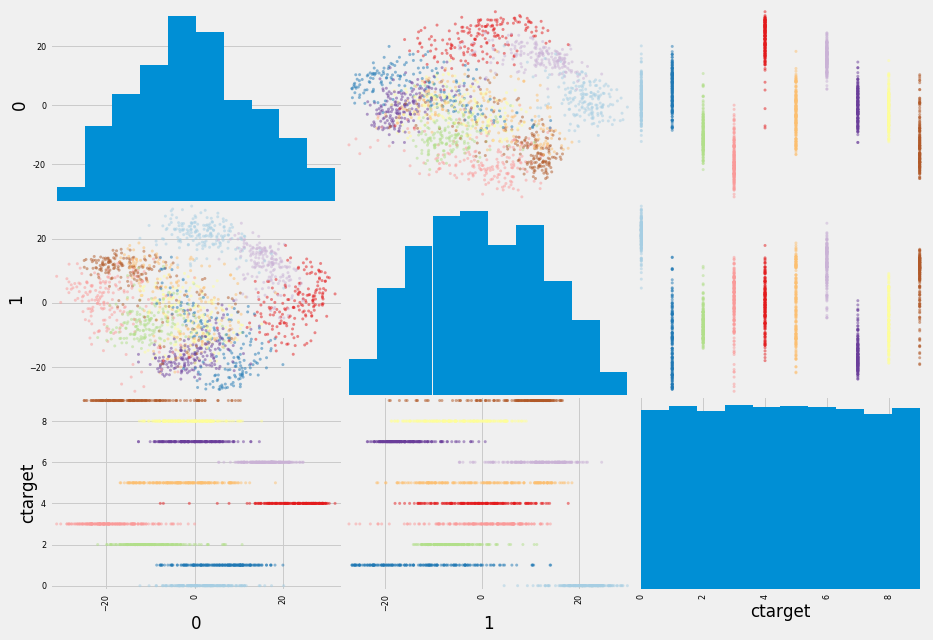

In [38]:
pca_d = pd.DataFrame(X_proj)
pca_d['ctarget'] = y
pd.scatter_matrix(pca_d, c=pca_d.ctarget, cmap='Paired', figsize=(14, 10));

### Make a larger plot to visualize better.

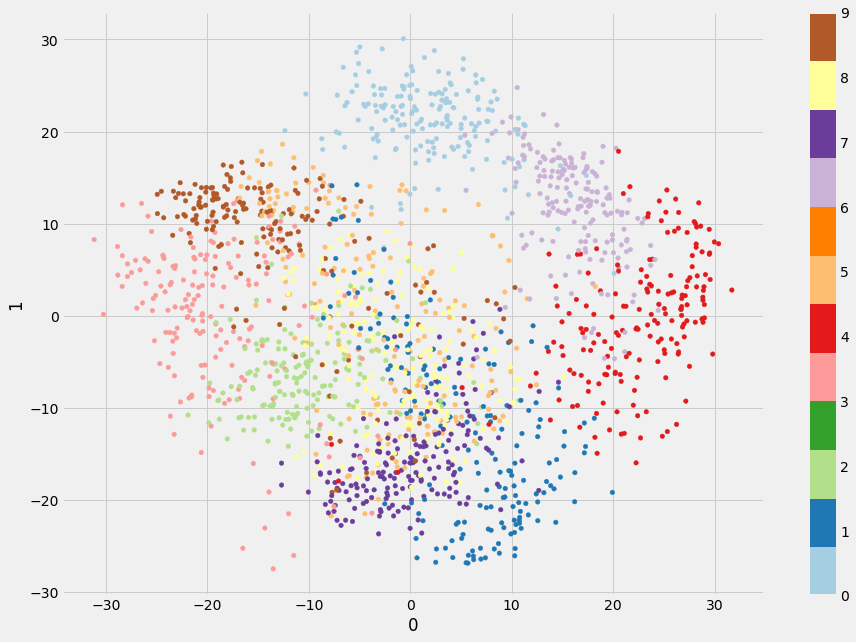

In [39]:
pca_d.plot(kind='scatter', x=0, y=1 , c=pca_d.ctarget, cmap='Paired', figsize=(14, 10))

### You might be wondering what the primary components look like.

It can be difficult to interpret what a primary component represents. In the case of images, a common trick is to plot the weighting matrix to help use visualize each component.

Below, dark pixels have a small weight, light pixel have a large weight.

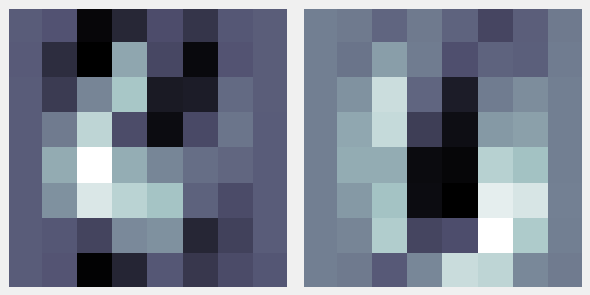

In [40]:
fig = plt.figure(figsize=(8,8))
fig.subplots_adjust(left=0, right=1, bottom=0, top=1, hspace=0.05, wspace=0.05)

# plot the faces, each image is 8 by 8 pixels 
for i in range(2): 
    ax = fig.add_subplot(1, 2, i+1, xticks=[], yticks=[])
    ax.imshow(np.reshape(pca_digits.components_[i,:], (8,8)), cmap=plt.cm.bone, interpolation='nearest')

<a id="other-applications"></a>
## Other Applications

We used dimensionality reduction to help us explore our data, but there are many more ways to employ dimensionality reduction:
- We can use our new feature matrix to make better predictions using superised learning
    - This can be very powerful when we have lots of unlabeled data and some labeled data
    - We can train dimensionality reduction on all of our data and use supervised learning on the labeled set which is now better represented.
- Market Basket Analysis can be done by storing customers as rows and items purchased as columns
- Latent Semantic Indexing using PCA (TruncatedSVD) to reduce redundant vocabulary in text problems
- Word2Vec and Latent Dirichlet Allocation are two popular techniques that use similar principles to simpllify text data
- Ultimately, dimensionality reduction leads us to neural networks which are capable of simultaneously learning more flexible decision boundaries and a better data representation.